<div style="text-align: right"> CS824 - Lab 5a (2022)</div>

# Some simple statsitical distributions

As we get to the later parts of the lab using Bayesian inference we will need to work with probability distributions, so if you are unfamiliar with these (you may only have drawn from random or Uniform distributions in previous labs) then the exercises below may be useful. If you feel confident in using distributions you can move straight to the "SUBMIT" elements and answer the questions.


# Bernoulli Distribution
This is probably the simplest type of probability distribution - as it generates only one of two outcomes, normally referred to as `success` or `failure` (or `1`/`0`; `yes`/`no`; `true`/`false`; etc.) and has only one parameter value `p`. (Sometimes `q` is also noted, but as this is simply `= 1 - p` it is not really a separate parameter.)

Formally we state that a random variable X that has a Bernoulli distribution will take the value `1` with the probability of success `p` and the value `0` with the probability of failure, `q` = (1 - `p`). While the Bernoulli distribution defines the success/failure of a single trial (n = 1) we will typically generate the set of outcomes over a range of trials to observe the 'average' behaviour of the distribution.

There are a number of ways to work with distributions in Python, with the functions in `numpy` and `scipy.stats` being  the most common. The best way to understand distributions is almost always to graph/plot them and as such we will use various plots to do so - mostly using the 'basic' functions of `matplotlib` but sometimes also using `seaborn` as it provides 'nicer' output at times (and gives you some exposure to more than one way of graphing output).


In [1]:
# Given that we will need them at various places, load these libraries now...

import numpy as np
import seaborn as sns
from scipy.stats import bernoulli, binom, uniform, poisson
import matplotlib.pyplot as plt


A common way to reference these types of distribution is to look at the output of a random variable that has been defined to be of that particular type. In this case we use the `bernoulli.rvs` function to generate a series of outputs. The function can take a few parameters, with the essential parameter being `p` to which we can also specify `size` the number of trials we wish to simulate. 


In [3]:
# A very basic call to the Bernoulli function could be used to create a random  variable 'r_Bern'.
# Here we are going to run 10 trials, each of which has a p(`success`) = 0.25

r_Bern = bernoulli.rvs(p=0.25, size=10)
print(r_Bern)


[1 0 0 0 1 0 0 0 1 0]


Note that every time you run those last two lines you will (almost certainly) get a different outcome...  Indeed, it is quite likely that you may run the command and get all `0` outcomes... (much **less** likely that you will get all `1`s - though you could in fact calculate how likely this might be, and we will do so when we get to the **Binomial** distribution below.)


## Exercise 5a1

Alter the values of the two parameters being passed to the Bernoulli fucntion above and check that the output makes sense to you...


In [12]:
r_Bern_exp = bernoulli.rvs(p=0.50, size=10)
print(r_Bern_exp)

[1 1 0 1 1 1 1 1 1 1]


## Exercise 5a2
Perhaps a more useful way to view the output is as a graph (histogram) that summarises the numbers of `0` and `1` outcomes...  We can do this using the code below. (Note that I have increased the overall number of trials and reduced the likelihood of getting a `success`.) 


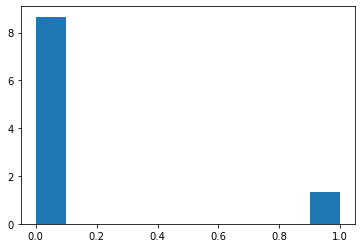

In [13]:
# Plotting, rather than just listing, the values produced for our Bernoulli distribution

# For this type of distribution it is arguably more useful to keep the y-axis limited to 1 - i.e. we are typically
# thinking in terms of proportions, rather than absolute numbers.

plt.hist(bernoulli.rvs(size=30,p=0.15),density=True)
plt.show()


## Exercise 5a2 (cont.)
Alter the `density` parameter to see the absolute number in the '0'and '1' classes of the output...


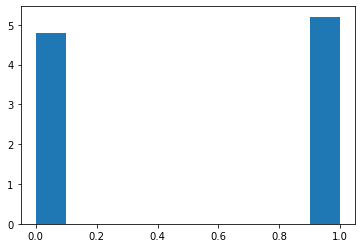

In [19]:
plt.hist(bernoulli.rvs(size=50,p=0.50),density=True)
plt.show()

# Binomial Distribution
This distribution builds on the Bernoulli in a way that makes things a bit more 'useful'. This is still a discrete probability distribution but now allows us to model the outcomes of a certain number of random trials within the same 'experiment'. The Binomial requires two parameters: the probability of success for any given trial (same as `p` in the case for Bernoulli), and also the number of trials (`n`) to be conducted within our experiment. The outcome of the Binomial distribution represents how likely it is that we will observe a given number of successes (up to `n`) in the experiment. 

So, if we wanted to model the tossing of a fair coin 8 times and assumed that there was a 50% chance of getting a head (which we can refer to as a `success`). The Binomial distribution will tell us how likely it is that we will get 0 heads, 1 head... up to 8 heads. 

Due to the random effects present in any random variable we need to run a number of experiments to get a picture of the 'average' behaviour over time...


## Exercise 5a3
Once again we use the **scipy** library, but now use the `binom.rvs` and will initally simulate 100 experiments.


In [20]:
fair_coin_tosses = binom.rvs(n=8,           # Number of trial in each experiment
                             p=0.5,         # Probability if success
                             size=100)      # Number of experiments

# fair_coin_tosses

In [21]:
# This output is not very easy to interpret - it just lists the outcome of each of 100 experiments.
# You many even see a "0" or "8" in this 100 outputs listed, maybe not, that depends on your random 
# number generator.  However, we could generate a table of values that might be more useful to get a 
# summary. (We will import pandas to help us out, but we could generate tables in other ways.)

import pandas as pd

print(pd.crosstab(index="counts", columns=fair_coin_tosses))


col_0   1  2   3   4   5   6  7
row_0                          
counts  5  7  18  28  21  19  2


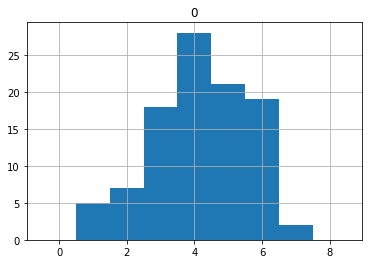

In [22]:
# We can see from the table that 3, 4, and 5 'successes' seem most likely but maybe a graph would be more useful?
# Pandas also provides some simple 'built in' graphs, such as histograms.

pd.DataFrame(fair_coin_tosses).hist(range=(-0.5, 8.5), bins=9);


## Exercise 5a4
This is where we may have a bit of an 'issue' in that I don't know how symetrical your set of outputs might happen to look, due to the fact that we will all get different results! However, mine did not look very symetrical with more cases of `3` than any other outcome.

Use the same distribution as above but simulate 1,000 experiments and then 10,000 to see what difference this makes...  (NB - esp for the case of 10,000 you may wish to switch off the on-screen output!!)


col_0   0   1    2    3    4    5   6   7  8
row_0                                       
counts  5  28  105  223  279  221  96  40  3


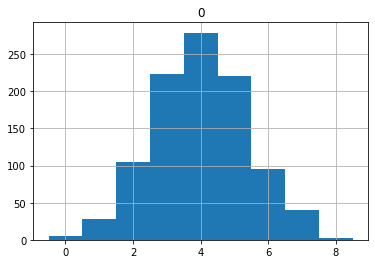

In [24]:
fair_coin_tosses_exp1000 = binom.rvs(n=8,           # Number of trial in each experiment
                                     p=0.5,         # Probability if success
                                     size=1000)     # Number of experiments

# fair_coin_tosses
print(pd.crosstab(index="counts", columns=fair_coin_tosses_exp1000))
pd.DataFrame(fair_coin_tosses_exp1000).hist(range=(-0.5, 8.5), bins=9);

col_0    0    1     2     3     4     5     6    7   8
row_0                                                 
counts  50  287  1106  2183  2742  2202  1096  301  33


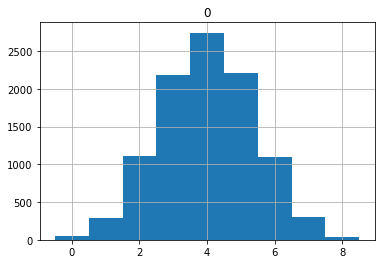

In [25]:
fair_coin_tosses_exp10000 = binom.rvs(n=8,           # Number of trial in each experiment
                                      p=0.5,         # Probability if success
                                      size=10000)    # Number of experiments

# fair_coin_tosses
print(pd.crosstab(index="counts", columns=fair_coin_tosses_exp10000))
pd.DataFrame(fair_coin_tosses_exp10000).hist(range=(-0.5, 8.5), bins=9);

## Exercise 5a5
Hopefully as you increased the number of simulations you found the shape of the distribution was a bit more stable and also symetrical (around the most common value of 4)? As the distribution is disrete the output values can only take on integer values {0 - 8} and so while the distribution looks a bit like the `normal` it will never have 'smooth' edges.


## Exercise 5a6
If you run a large enough number of experiments then the distribution will converge to stable values...  this is nicely illustrated in the [Online_Stats_Book](http://onlinestatbook.com/2/calculators/binomial_dist.html) calculator for the Binomial distribution.

Compare the outputs from that calculator to your own. You may also notice that you can get probabilities for specific values or ranges of values (below the graphical output). We can use the probability mass function (`pmf`) and cummulative density function (`cdf`) to get the sorts of probability values shown in that panel.

A couple of examples are shown below to give you the syntax of the necessary function calls. 

Modify these to find, for the case of experiments consisting of **20** 'fair' trials, the chances of:

 - getting exactly 12 successes   {I get the value = 0.1201}
 - getting at most 6 succesful outcomes  {I get the value = 0.0577}
 - getting 11 or more successful outcomes  {I get the value = 0.4119}
 - getting 18 or more successful ourcomes  {I got value = 0.0002...  which I notice the **_Online-Stats calculator_** reports as "0"}

(You could of course get these pretty easily from the **_Online-Stats calculator_** but that would be 'cheating'!!  However, feel free to use it to check your values.)


In [26]:
binom.pmf (k=8,      # Probability of exactly k = 8 successes
           n=15,     # In an experiment involing 15 trials
           p=0.5)    # With the success of probability = 0.5


0.19638061523437514

In [27]:
binom.cdf (k=3,      # Probability of k = 3 successes or less (i.e. cummulative up to at most 3)
           n=10,     # In an experiment involing 10 trials
           p=0.2)    # With the success of probability = 0.2


0.8791261183999999

In [28]:
1 - binom.cdf(k=8,         # Probability of k = 9 successes or more (1 minus the cummulative total up to 8)
              n=12,        # In an experiment involing 12 trials
              p=0.5)       # With the success of probability = 0.5


0.072998046875

## Exercise 5a7 (SUBMIT)
Let's be a bit sexist for a moment and assume that 80% of the population who purchase sports cars are men. If 10 sports car owners are picked at random what is the probability that this will include 8 or more men?

Does this answer seem to make intutitve sense?  If not, is it lower/higher than you expected?

What is the probability that there will be more than 4 women in this random sample? 


In [40]:
1 -binom.cdf (k=7,      # Probability of k = 8 successes or more (i.e. the scenario will include 8 or more men)
              n=10,     # In an experiment involing 10 trials
              p=0.8)    # With the success of probability = 0.5

0.6777995264000001

In [41]:
# This is the probability when we consider 'k' for women in perspective of Men where
# 'p' is the proportion of men purchasing sports car
binom.cdf (k=5,      # Probability of k = 5 successes or more (i.e. more than 4 women in the random sample)
           n=10,     # In an experiment involing 10 trials
           p=0.8)    # With the success of probability = 0.8

0.03279349759999997

In [44]:
# This is the probability when we consider 'k' for men in perspective of Men where
# 'p' is the proportion of women purchasing sports car
1 - binom.cdf (k=4,      # Probability of k = 5 successes or more (i.e. more than 4 women in the random sample)
               n=10,     # In an experiment involing 10 trials
               p=0.2)    # With the success of probability = 0.2

0.032793497600000054

## Stats Distributions in `scipy`
This may be a good time to review the various types of functions in `scipy` associated with random variables.

- `stats.{distribution}.rvs()` are used to generate random numbers from the specified {distribution}, such as in the example of our 10,000 values from the `uniform` distibution above.
- `stats.{distribution}.cdf()` the "cumulative distribution function" (cdf) can be used to determine the likelihood that an observation drawn from the specified distribution will fall below a specified value. Remember that the total area within an probability distribution must sum to 1 and as such this value is equivalent to the area within the density curve to the left of the value specifed.
- `stats.{distribution}.ppf()` this can be seen as the 'inverse' of the cumulative distribution function - it stands for "percent point function". This returns the x cut-off value that is associated with the given probability (quantile). So we could, for example, ask for the cut-off value at whcih we have a 30% chance of drawing an observation from the distribution below this value.
- `stats.{distribution}.pdf()` the "probability density function" returns the probability (the height of the density function) for a given value of x. (This is not very interesting for the uniform case as all outcomes within the range have the same density/probability value, while all outcomes outside then range have a probability density of 0!)

If you watched the short video by Ben Lambert introducing his little app the **Distribution Zoo** then you may remember that he has a feature where you can create a function (using menus), look at its PDF/CDF/etc, and then also show the code needed to create this function in a vareity of languages. Ben's app is here -

        https://ben18785.shinyapps.io/distribution-zoo/
        
while his video on its use can be seen at the following link -
        
        https://www.youtube.com/watch?v=mGaZHhGwF4Y&list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG&index=75


### Distributions are also available in Numpy

There are in fact many other packages in Python to allow us to work with random variables and statistical distributions; in fact in the 'Swedish Fish Inc' examples that come next, we will switch to using the functions that are offered to us in `Numpy`.
